Here, we want to find triads that are persistent across all, or a large share, of the years.

Our approach will be simple: first, produce a dataframe of triad existence for each year (using the main networks in out/belief_networks), then, search through the dataframe for persistent structure. 

We'll compare the neighbourhood of these triads to real-word events or paradigmatic issues and see if it tracks.

In [41]:
""" First we import adj matrices and variables names from ../out/belief_networks/year_start-year_end, R=_, Condition=None"""
import numpy as np
import pandas as pd
import csv

def get_adj_matrix(year_start, year_end, R):
    ' import csv '
    with open(f"../out/belief networks/{year_start}-{year_end}, R={R}, Condition=None/correlation_matrix_partial.csv", "r") as f:
        reader = csv.reader(f)
        data = list(reader)
    ' convert to numpy array '
    data = np.array(data)
    ' set diagonal to zero '
    np.fill_diagonal(data, 0)
    ' convert to float '
    data = data.astype(float)
    ' return '

    with open(f"../out/belief networks/{year_start}-{year_end}, R={R}, Condition=None/variables_list.csv", "r") as f:
        reader = csv.reader(f)
        variables_list = list(reader)
    ' convert list of lists to list of strings'
    variables_list = [item for sublist in variables_list for item in sublist]
    return data, variables_list

def get_triads(mat, var):
    ' Get all non-zero triads and store them in a pandas DataFrame. '
    triad_data = []
    for i in range(len(mat)):
        for j in range(len(mat)):
            for k in range(len(mat)):
                if mat[i][j] != 0 and mat[j][k] != 0 and mat[i][k] != 0:
                    triad_data.append({
                        'Triad_names': (var[i], var[j], var[k]),
                        'Triad_nodes': (i, j, k),
                        'Triad_strength': (mat[i][j], mat[j][k], mat[i][k]),
                        'Triad_abs_sum': abs(mat[i][j]) + abs(mat[j][k]) + abs(mat[i][k]),
                        'Balance': np.sign(mat[i][j] * mat[j][k] * mat[i][k]) 
                    })
    triads_df = pd.DataFrame(triad_data)    
    return triads_df

def get_triads(mat, var):
    """Get all unique non-zero triads and store them in a pandas DataFrame."""
    triad_data = []
    seen_triads = set()

    for i in range(len(mat)):
        for j in range(i + 1, len(mat)):
            for k in range(j + 1, len(mat)):
                if mat[i][j] != 0 and mat[j][k] != 0 and mat[i][k] != 0:
                    # Sort the nodes to ensure all equiv. triads are recognised
                    triad = tuple(sorted((var[i], var[j], var[k])))
                    if triad not in seen_triads:
                        seen_triads.add(triad)
                        triad_data.append({
                            'Triad_names': triad,
                            'Triad_nodes': tuple(sorted((i, j, k))),
                            'Triad_strength': (mat[i][j], mat[j][k], mat[i][k]),
                            'Triad_abs_sum': abs(mat[i][j]) + abs(mat[j][k]) + abs(mat[i][k]),
                            'Balance': np.sign(mat[i][j] * mat[j][k] * mat[i][k])
                        })

    triads_df = pd.DataFrame(triad_data)
    return triads_df

In [83]:
' Now we can append the year of each triad to the DataFrame '
start_year = 1972
for year in range(start_year, 2018, 2):
    mat, var = get_adj_matrix(year, year+4, 0.2)
    triads_df = get_triads(mat, var)
    triads_df['Year'] = year
    if year == start_year:
        all_triads_df = triads_df
    else:
        all_triads_df = pd.concat([all_triads_df, triads_df])
' make year the first column '
cols = all_triads_df.columns.tolist()
cols = cols[-1:] + cols[:-1]
all_triads_df = all_triads_df[cols]
print(all_triads_df.head())


   Year                  Triad_names  Triad_nodes  \
0  1972    (COLCOM, GRASS, POLVIEWS)  (1, 17, 25)   
1  1972  (COLCOM, POLVIEWS, XMARSEX)  (1, 17, 56)   
2  1972  (COLCOM, HOMOSEX, POLVIEWS)  (1, 17, 57)   
3  1972  (GRASS, POLVIEWS, PREMARSX)  (1, 25, 55)   
4  1972   (GRASS, POLVIEWS, XMARSEX)  (1, 25, 56)   

                                      Triad_strength  Triad_abs_sum  Balance  
0  (0.03864719758865619, -0.05847463237616479, -0...       0.107256      1.0  
1  (0.03864719758865619, 0.021754681401402364, 0....       0.075098      1.0  
2  (0.03864719758865619, 0.024624036985684505, 0....       0.066955      1.0  
3  (-0.010134269241189353, -0.10121227793574408, ...       0.131828      1.0  
4  (-0.010134269241189353, -0.09975218506631944, ...       0.124582      1.0  


In [72]:
' Basic tool: find all instances of a triad '
triad = ('ABDEFECT', 'ABNOMORE', 'ABSINGLE')
all_triads_df = all_triads_df.sort_values(by='Year')

' Try all permutations of the triad '
triad_instances = []
for i in range(3):
    for j in range(3):
        for k in range(3):
            ' do not append empty dataframes '
            if not all_triads_df[all_triads_df['Triad_names'] == (triad[i], triad[j], triad[k])].empty:
                triad_instances.append(all_triads_df[all_triads_df['Triad_names'] == (triad[i], triad[j], triad[k])])
# print(triad_instances)

' Print triad frequencies '

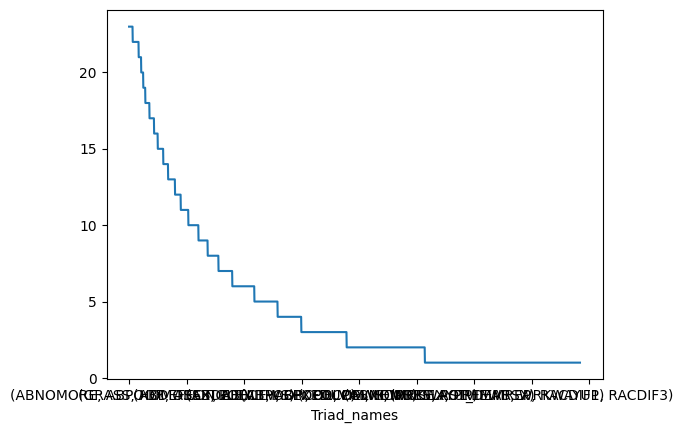

In [102]:
' Basic tool: find most common triads across all years (and plot frequency distribution) '

'order df by sum of abs. value triad strengths' 
all_triads_df = all_triads_df.sort_values(by='Triad_abs_sum', ascending=False)


most_common_triads = all_triads_df['Triad_names'].value_counts()
most_common_triads.plot(kind='line', logy=False)

' Print triad frequencies '
# print(most_common_triads[:50])

In [192]:
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px

# Set triads to all unique triads in the DataFrame
triads = all_triads_df['Triad_names'].unique()

# Delete triads with less than 20 instances
triad_counts = all_triads_df['Triad_names'].value_counts()
triads = triad_counts[triad_counts > 2].index

# Initialize a list to hold traces for each triad
traces = []

# Loop through each triad in the list of triads
for triad in triads:
    triad_strengths = pd.DataFrame()

    # Extract the strength for each combination within the triad
    for i in range(3):
        for j in range(3):
            for k in range(3):
                filtered_df = all_triads_df[all_triads_df['Triad_names'] == (triad[i], triad[j], triad[k])]
                if not filtered_df.empty:
                    triad_strengths = pd.concat([triad_strengths, filtered_df[['Year', 'Triad_abs_sum']]])

    # Sort by year
    triad_strengths = triad_strengths.sort_values(by='Year', ascending=True)
    
    # Check if there is any Triad_abs_sum value >= 0.5
    if (triad_strengths['Triad_abs_sum'] >= 0.5).any():
        # Sort by year
        triad_strengths = triad_strengths.sort_values(by='Year', ascending=True)
        
        # Add a trace for the current triad
        traces.append(go.Scatter(
            x=triad_strengths['Year'],
            y=triad_strengths['Triad_abs_sum'],
            mode='lines+markers',
            name=f'{triad[0]}-{triad[1]}-{triad[2]}',
            hovertemplate=f'{triad[0]}-{triad[1]}-{triad[2]}<extra></extra>'
        ))

In [194]:
# Define the layout of the plot
layout = go.Layout(
    title='Triad Absolute Strength Over Time',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Triad Absolute Sum', range=[-0.05, 1.05]),
    legend=dict(title='Triads', orientation='v', x=1.05, y=1),
    hovermode='closest'
)

# Create the figure
fig = go.Figure(data=traces, layout=layout)

# Show the plot
fig.show()


fig = go.Figure(data=traces, layout=layout)
fig.write_html('interactive_plot_triads.html')

In [ ]:
' Next we want to pick some strong triads and plots '

